In [10]:
import imageio
import pathlib
import numpy as np
import glob

training_path= pathlib.Path("/Users/sharadindpeddiraju/Documents/MSBA/computer vison/stage1_train").glob("*/images/*.png")
training_sorted = sorted([x for x in training_path])
#we are working with one image. Here we chose the 45th image in the list
im_path = training_sorted[45]
im = imageio.imread(str(im_path))

In [18]:
520*696

361920

###### dealing with color --> all into grayscale

In [11]:
print("image original shape : {}".format(im.shape))

from skimage.color import rgb2gray
im_gray= rgb2gray(im)
print("new image shape in grayscale: {}".format(im_gray.shape))

image original shape : (520, 696, 4)
new image shape in grayscale: (520, 696)


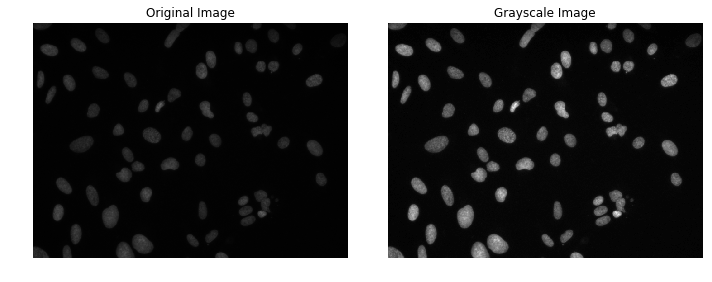

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(im_gray,cmap="gray")
plt.axis('off')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()

In [4]:
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(im_gray)
mask = np.where(im_gray> thresh_val,1,0)

#if np.sum(mask==0)<np.sum(mask==1):
#    mask= np.where(mask,0,1)

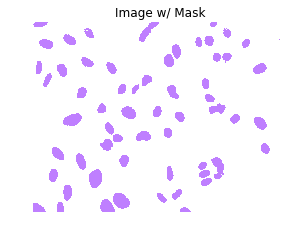

In [14]:
plt.figure(figsize=(10,4))
#plt.subplot(1,2,1)
#im_pixel = im_gray.flatten()
#plt.hist(im_pixel,bins=50)
#plt.vlines(thresh_val,0,100000, linestyle='--')
#plt.ylim(0,50000)

plt.subplot(1,2,2)
mask_for_display= np.where(mask,mask,np.nan)
#plt.imshow(im_gray,cmap = 'gray')
plt.imshow(mask_for_display, cmap='rainbow', alpha=0.5)
plt.axis('off')
plt.title('Image w/ Mask')
plt.show()

In [23]:
from scipy import ndimage
labels, nlabels = ndimage.label(mask)

#labels_array=[]
#for label_num in range(0,nlabels+1):
#    label_num= np.where(labels == label_num,1,0) #matching objects with labels
#    labels_array.append(label_num)
    
print("individual objects detected = {}".format(nlabels))

individual objects detected = 76


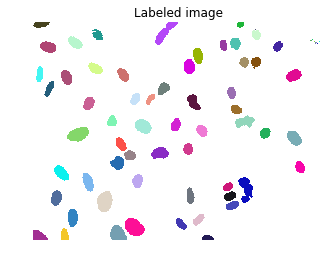

In [22]:
#create colormap for each object 
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(255,3))

labels_for_display = np.where(labels>0, labels,np.nan)
#plt.imshow(im_gray, cmap= 'gray')
plt.imshow(labels_for_display, cmap= rand_cmap)
plt.axis('off')
plt.title('Labeled image')

plt.show()


##### ndimage.find_objects --> we can use this to find individual objects by zooming in on the image and adjusting contours  for better accuracy. 


In [27]:
for label_ind, label_coords in enumerate(ndimage.find_objects(labels)):
    cell = im_gray[label_coords]
    
    #label size check 
    if np.product(cell.shape) < 10: 
        print('Label {} is too small! Setting to 0.'.format(label_ind))
        mask = np.where(labels==label_ind+1, 0, mask)
        
    #regenerate labels 
    labels, nlabels = ndimage.label(mask)
    print('individual obejcts detected = {}'.format(nlabels))

individual obejcts detected = 76
individual obejcts detected = 76
individual obejcts detected = 76
individual obejcts detected = 76
Label 4 is too small! Setting to 0.
individual obejcts detected = 75
Label 5 is too small! Setting to 0.
individual obejcts detected = 74
individual obejcts detected = 74
Label 7 is too small! Setting to 0.
individual obejcts detected = 73
Label 8 is too small! Setting to 0.
individual obejcts detected = 72
Label 9 is too small! Setting to 0.
individual obejcts detected = 71
Label 10 is too small! Setting to 0.
individual obejcts detected = 70
individual obejcts detected = 70
individual obejcts detected = 70
individual obejcts detected = 70
Label 14 is too small! Setting to 0.
individual obejcts detected = 69
Label 15 is too small! Setting to 0.
individual obejcts detected = 68
Label 16 is too small! Setting to 0.
individual obejcts detected = 67
individual obejcts detected = 67
individual obejcts detected = 67
Label 19 is too small! Setting to 0.
individu

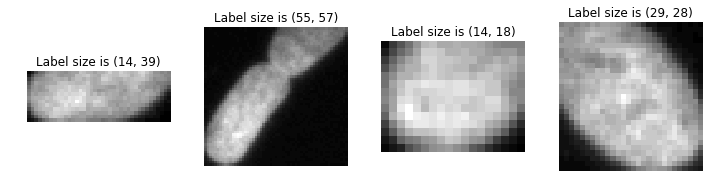

In [91]:
fig, axes = plt.subplots(1,4,figsize=(10,6))

for ii, obj_index in enumerate(ndimage.find_objects(labels)[0:4]):
    cell = im_gray[obj_index]
    
    axes[ii].imshow(cell, cmap='gray')
    axes[ii].axis('off')
    axes[ii].set_title('Label size is {}'.format(cell.shape))
    
plt.tight_layout()
plt.show()

## Erosion

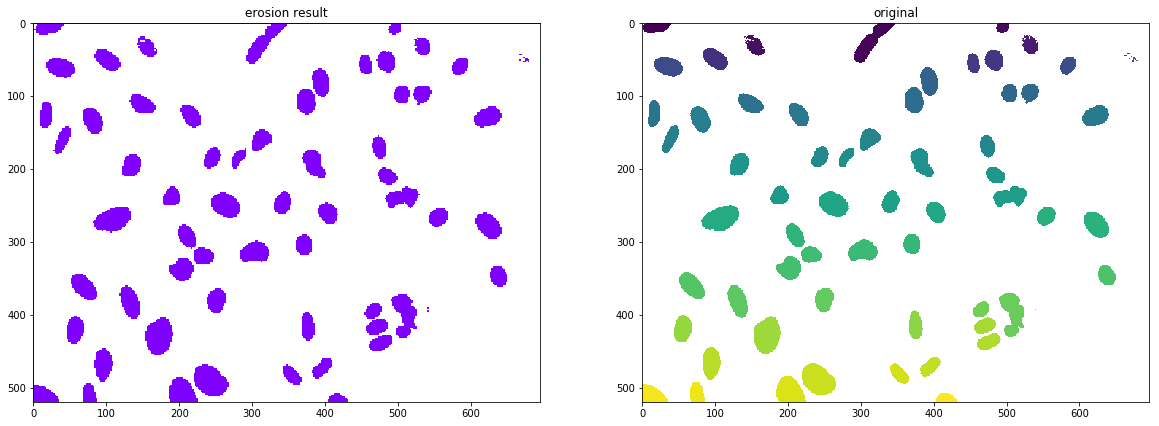

In [37]:
import cv2
kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(labels_for_display, kernel, iterations=1)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("erosion result")
plt.imshow(img_erosion,cmap="rainbow")

plt.subplot(1,2,2)
plt.title("original")
plt.imshow(labels_for_display)
plt.show()

In [26]:
!pip3 install opencv-python

     |████████████████████████████████| 52.1MB 246kB/s  eta 0:00:01    |█████████████████▏              | 28.0MB 6.3MB/s eta 0:00:04
